## Часть I: О теореме Байеса

**1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.**

Прокурор оценил априорные вероятности, с которыми:
* выбирая случайного человека из всего населения можно получить человека с редкой группой крови (1%);
* выбирая случайного человека из всего населения можно получить человека не с редкой группой крови (99%).

При этом должен был оценить *апостериорную* вероятность того, что подсудимый – убийца, при условии, что кровь убийцы принадлежит к редкой группе.

**2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?**

Адвокат оценил вероятность того, что человек, выбранный случайно из части населения города с редкой группой крови – убийца, при условии, что кровь убийцы принадлежит к редкой группе.

При этом должен был оценить вероятность того, что именно подсудимый – убийца (а не случайный человек с редкой группой крови), при условии, что кровь убийцы принадлежит к редкой группе.

**3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?**


Формула для апостериорной вероятности болезни после положительного теста:
$$p(d=1|t=1) = \frac{p(t=1|d=1)p(d=1)}{p(t=1|d=1)p(d=1)+p(t=1|d=0)p(d=0)}$$

При этом:
$$p(t=1|d=0) = FP$$
$$p(t=1|d=1) = 1-FP$$

Тогда:
$$p(d=1|t=1) = \frac{0.01(1-FP)}{0.01+0.98FP}$$

Формула для апостериорной вероятности болезни после отрицательного теста:
$$p(d=1|t=0) = \frac{p(t=0|d=1)p(d=1)}{p(t=0|d=1)p(d=1)+p(t=0|d=0)p(d=0)}$$

При этом:
$$p(t=0|d=1) = FN$$
$$p(t=0|d=0) = 1-FN$$

Тогда:
$$p(d=1|t=0) = \frac{0.01FN}{0.99-0.98FN}$$

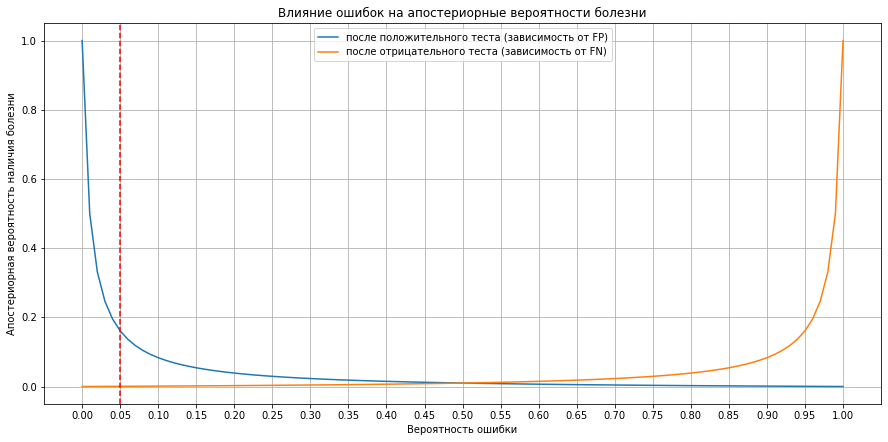

In [1]:
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
xs = np.arange(0, 1.01, 0.01)
p11 = 0.01*(1 - xs) / (0.01 + 0.98 * xs)
p10 = 0.01 * xs / (0.99 - 0.98 * xs)

ax.set_title('Влияние ошибок на апостериорные вероятности болезни')
ax.plot(xs, p11, label="после положительного теста (зависимость от FP)")
ax.plot(xs, p10, label="после отрицательного теста (зависимость от FN)")

ax.set_xlabel('Вероятность ошибки')
ax.set_ylabel('Апостериорная вероятность наличия болезни')

ax.set_xticks(np.arange(0, 1.05, 0.05))
ax.axvline(0.05, color='r', linestyle='--')

ax.legend()
ax.grid()

На основе построенных графиков видно, что при уровне обеих ошибок в 5%, большего эффекта получится достичь при уменьшении ошибки false positives (FP). При уменьшении FP вероятность болезни после положительного теста вырастет значительно, когда при уменьшении FN вероятность болезни после отрицательного теста практически не уменьшится (при FN=0.05 уже близка к нулю).

## Часть II: О линейной регрессии

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression

from scipy.stats import multivariate_normal
import seaborn as sns

**1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/made/adv_ml/owid-covid-data.csv')

In [4]:
df_rus = df[df['location'] == 'Russia'].sort_values(by='date')

In [5]:
train = df_rus[pd.to_datetime(df_rus['date']) >= dt.datetime(2020,3,1)][:50][['total_cases',
                                                                              'new_cases', 'date']]
test = df_rus[pd.to_datetime(df_rus['date']) >= dt.datetime(2020,3,1)][50:][['total_cases',
                                                                              'new_cases', 'date']]

train['day_num'] = np.arange(1, len(train) + 1)
test['day_num'] = np.arange(len(train) + 1, len(test) + len(train) + 1)

train['new_cases'] = train['new_cases'].replace(0, 1)
test['new_cases'] = test['new_cases'].replace(0, 1)

**2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.**

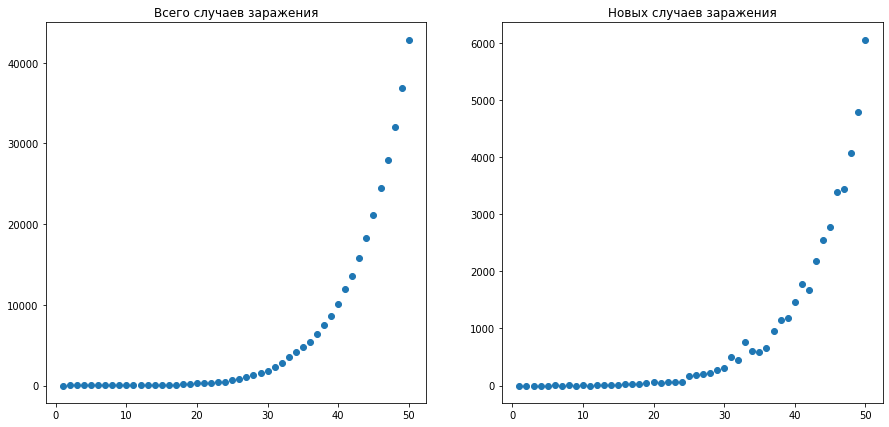

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].scatter(train['day_num'], train['total_cases'])
ax[0].set_title('Всего случаев заражения')

ax[1].scatter(train['day_num'], train['new_cases'])
ax[1].set_title('Новых случаев заражения')

plt.show()

**a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.**

In [7]:
reg_exp_total = LinearRegression()
reg_exp_total.fit(train[['day_num']], np.log(train[['total_cases']]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

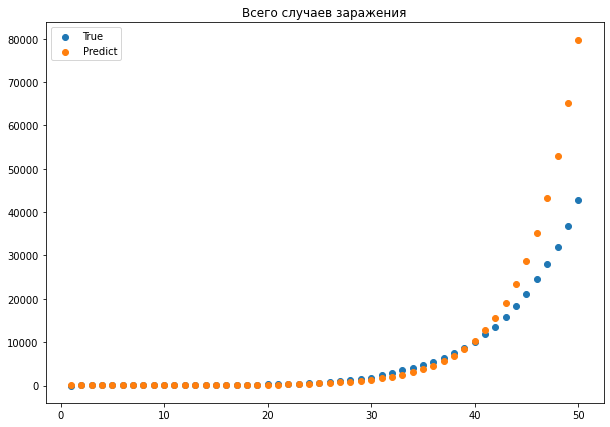

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.scatter(train['day_num'], train['total_cases'], label='True')
ax.scatter(train['day_num'], 
            np.exp(reg_exp_total.predict(train[['day_num']])), label='Predict')
ax.set_title('Всего случаев заражения')
ax.legend()

plt.show()

**b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).**

In [9]:
sigma_noise = np.std(reg_exp_total.predict(train[['day_num']]) - np.log(train[['total_cases']]))[0]

In [10]:
N = 1000
xs = np.linspace(0, 50, N)
X = np.linspace(.75, 1.5, N)
Y = np.linspace(.1, .3, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z, xlim=(.75, 1.5), ylim=(.15, .25)):
    # Make the plot
    plt.axis('equal')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

In [11]:
cur_mu, cur_sigma = np.array([0, 0]), np.array([[50, 0], [0, 50]])

In [12]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y])))
    return mu_n, sigma_n

In [13]:
for i in range(train.shape[0]):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, 
                                        train.iloc[i]['day_num'], 
                                        np.log(train.iloc[i]['total_cases']), 
                                        sigma_noise=sigma_noise)

In [14]:
print("Параметры апостериорного распределения весов модели:")
print(f"mu: {cur_mu}")
print(f"sigma: {cur_sigma}")

Параметры апостериорного распределения весов модели:
mu: [1.07222609 0.20430367]
sigma: [[ 9.48002875e-03 -2.81584997e-04]
 [-2.81584997e-04  1.10430569e-05]]


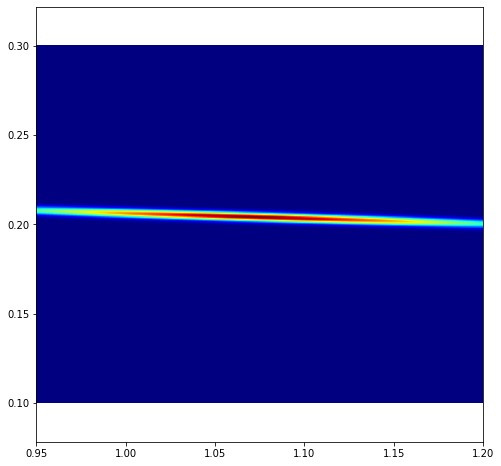

In [15]:
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_heatmap(Z, (.95, 1.2), (.1, .3))

**c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).**

In [16]:
def myplot_sample_lines(mu, sigma, xs, n=20, points=None, plot=False):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    sample_distrs = []

    # plt.axis('equal')
    for w in my_w:
        if plot:
            plt.plot(xs, np.exp(w[0] + w[1] * xs), 'k-', lw=.4, alpha=.6)
        sample_distrs.append(np.exp(w[0] + w[1] * xs))
    if plot:
        plt.ylim((0, 80000))
        plt.xlim((0, 60))
        if not points is None:
            plt.scatter(points[0], points[1], marker='*', s=200)

    return np.array(sample_distrs)

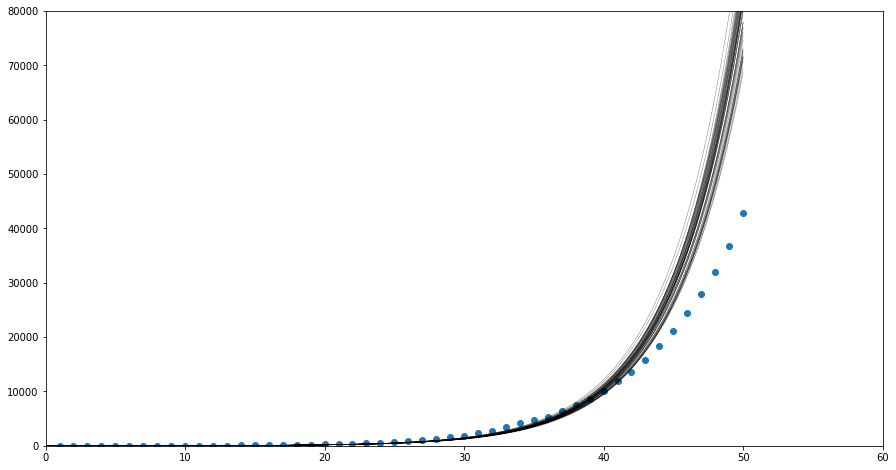

In [17]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

ax.scatter(train['day_num'], train['total_cases'], label='True')

sample_distrs = myplot_sample_lines(cur_mu, cur_sigma, xs, 50, plot=True)

In [18]:
fig = plt.figure(figsize=(15, 8))
xs_future = np.arange(0, 200)
sample_distrs = myplot_sample_lines(cur_mu, cur_sigma, xs_future, 2500)

<Figure size 1080x576 with 0 Axes>

In [19]:
months = [5, 6, 9]
records_nums = [test[pd.to_datetime(test['date']) == dt.datetime(2020, month, 1)].day_num.values[0] for month in months]
for month, res in zip(months, sample_distrs.mean(axis=0)[records_nums]):
    formatted_res = '{0:,}'.format(int(res)).replace(',', ' ')
    print(f"Прогноз общего числа заболевших к 01-0{month}-2020: {formatted_res} человек")

Прогноз общего числа заболевших к 01-05-2020: 931 070 человек
Прогноз общего числа заболевших к 01-06-2020: 532 579 203 человек
Прогноз общего числа заболевших к 01-09-2020: 86 543 321 056 715 232 человек


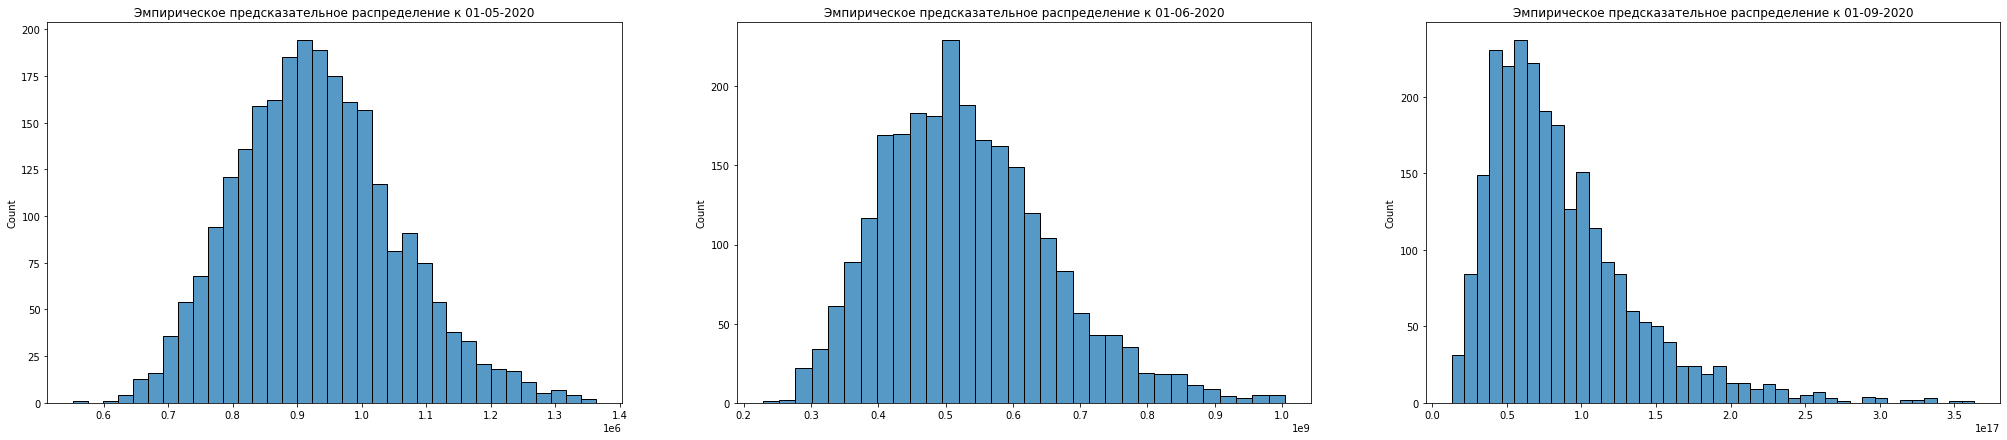

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(35, 7))
for i in range(len(months)):
    sns.histplot(sample_distrs[:, records_nums[i]], ax=ax[i])
    ax[i].set_title(f'Эмпирическое предсказательное распределение к 01-0{months[i]}-2020')
plt.show()

**3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:
$$ \Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-t^2/2} \, dt$$**

**Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.**

**a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.**

Возьмем производные от обеих частей уравнения: 
$$ \frac{d({total\_cases})}{dx} = \frac{d\left(\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{1}{2} \left(w_0 + w_1t + w_2t^2 \right)} \, dt\right)}{dx}$$

Слева ежедневный прирост ${total\_cases}$, справа производная от интеграла с переменным верхним пределом:
$$ {new\_cases} = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2} \left(w_0 + w_1x + w_2x^2 \right)}$$

Прологарифмируем обе части уравненеия, предварительно поместив все константы под экспоненту:

$$ln({new\_cases}) = w'_0 + w'_1x + w'_2x^2$$

Для формирования прогноза общего числа заболевших $total\_cases$ при таком подходе можно использовать сумму прогнозов по всем $new\_cases$, до текущего отчета времени.

**b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.**

In [21]:
reg_exp_new = LinearRegression()
train['day_num_2'] = train['day_num'] ** 2
reg_exp_new.fit(train[['day_num', 'day_num_2']], np.log(train[['new_cases']]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
sigma_noise = np.std(reg_exp_new.predict(train[['day_num', 'day_num_2']]) - np.log(train[['new_cases']]))[0]

In [23]:
N = 1000
xs = np.linspace(0, 50, N)
X = np.linspace(.75, 1.5, N)
Y = np.linspace(.1, .3, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z, xlim=(.75, 1.5), ylim=(.15, .25)):
    # Make the plot
    plt.axis('equal')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

In [24]:
cur_mu, cur_sigma = np.array([0, 0, 0]), 50 * np.identity(3)

In [25]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x, x ** 2]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y])))
    return mu_n, sigma_n

In [26]:
for i in range(train.shape[0]):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, 
                                        train.iloc[i]['day_num'], 
                                        np.log(train.iloc[i]['new_cases']), 
                                        sigma_noise=sigma_noise)

In [27]:
print("Параметры апостериорного распределения весов модели:")
print(f"mu: {cur_mu}")
print(f"sigma: {cur_sigma}")

Параметры апостериорного распределения весов модели:
mu: [-0.93115284  0.26124946 -0.00139053]
sigma: [[ 4.97606334e-02 -3.94078495e-03  6.50293927e-05]
 [-3.94078495e-03  4.07249710e-04 -7.50574308e-06]
 [ 6.50293927e-05 -7.50574308e-06  1.47187441e-07]]


**c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?**

In [28]:
def myplot_sample_lines_sigm(mu, sigma, xs, ax, n=20, points=None, plot=False,
                             ylim=(0, 1e5), xlim=(0,150)):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    sample_distrs = []

    # plt.axis('equal')
    for w in my_w:
        if plot:
            ax.plot(xs, np.cumsum(np.exp(w[0] + w[1] * xs + w[2] * xs ** 2)), 'k-', lw=.4, alpha=.6)
        sample_distrs.append(np.cumsum(np.exp(w[0] + w[1] * xs + w[2] * xs ** 2)))
    if plot:
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
        if not points is None:
            ax.scatter(points[0], points[1], marker='*', s=200)

    return np.array(sample_distrs)

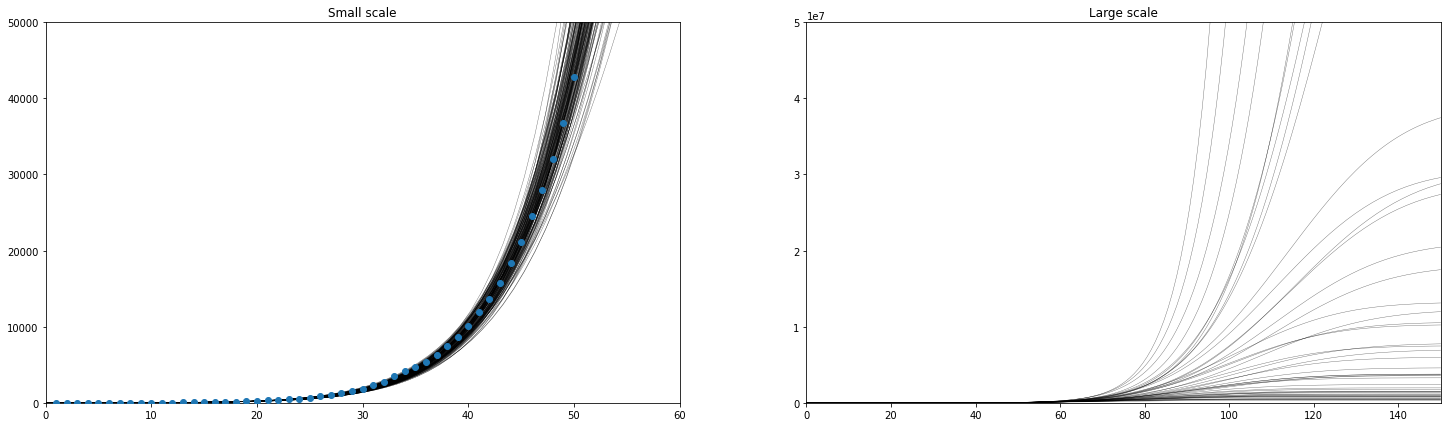

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(25, 7))
sample_distrs = myplot_sample_lines_sigm(cur_mu, cur_sigma, np.linspace(0, 150, 150), ax[0], 150, plot=True,
                                         xlim=(0, 60), ylim=(0, 50000))
ax[0].scatter(train['day_num'], train['total_cases'], label='True', zorder=150)

ax[0].set_title('Small scale')

sample_distrs = myplot_sample_lines_sigm(cur_mu, cur_sigma, np.linspace(0, 150, 150), ax[1], 50, plot=True,
                                         xlim=(0, 150), ylim=(0, 5e7))
ax[1].set_title('Large scale')

plt.show()

In [30]:
sample_distrs = myplot_sample_lines_sigm(cur_mu, cur_sigma, np.linspace(0, 200, 200), ax[1], 1500)

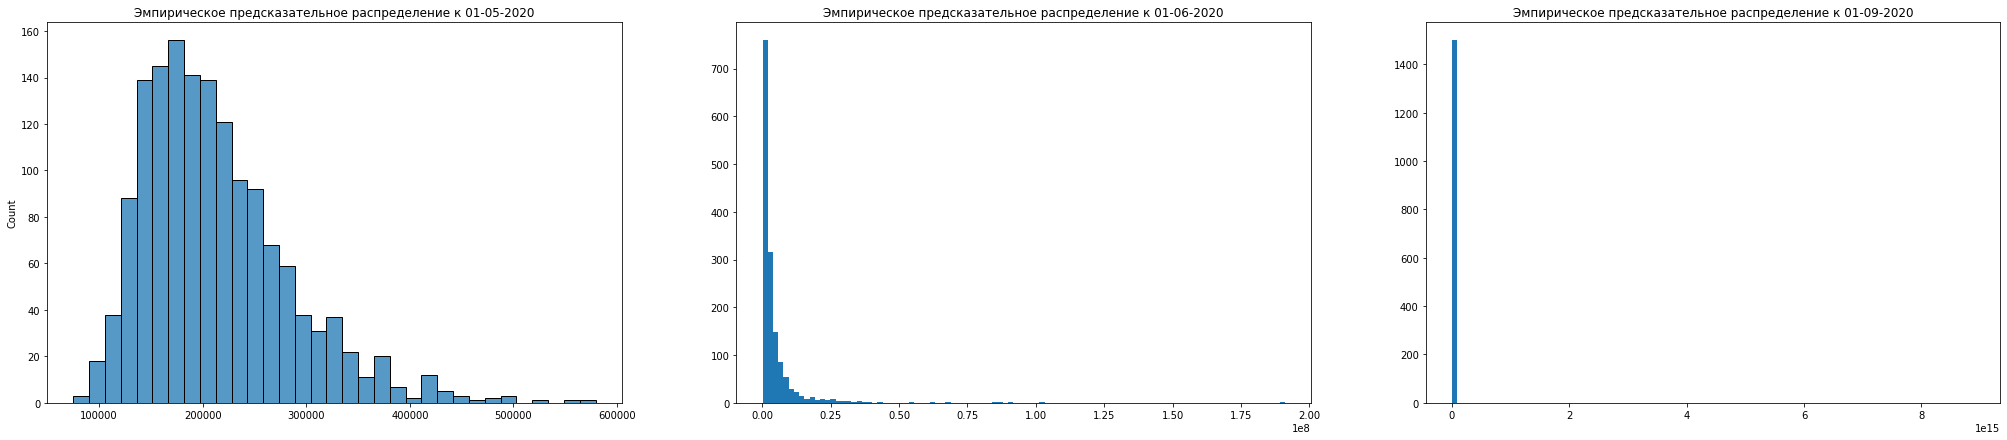

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(35, 7))
for i in range(len(months)):
    if not i:
        sns.histplot(sample_distrs[:, records_nums[i]], ax=ax[i])
    else:
        ax[i].hist(sample_distrs[:, records_nums[i]], bins=100)
    ax[i].set_title(f'Эмпирическое предсказательное распределение к 01-0{months[i]}-2020')
plt.show()

In [32]:
print("Пессимистичный прогноз общего числа заболевших:")
sample_distrs = myplot_sample_lines_sigm(cur_mu, cur_sigma, np.arange(0, 200), None, 1500, plot=False)

months = [5, 6, 9]
records_nums = [test[pd.to_datetime(test['date']) == dt.datetime(2020, month, 1)].day_num.values[0] for month in months]
for month, res in zip(months, np.percentile(sample_distrs[:, records_nums], 90, axis=0)):
    formatted_res = '{0:,}'.format(int(res)).replace(',', ' ')
    print(f"    К 01-0{month}-2020: {formatted_res} человек")

Пессимистичный прогноз общего числа заболевших:
    К 01-05-2020: 294 454 человек
    К 01-06-2020: 8 786 354 человек
    К 01-09-2020: 154 216 935 человек


In [33]:
print("Оптимистичный прогноз общего числа заболевших:")
sample_distrs = myplot_sample_lines_sigm(cur_mu, cur_sigma, np.arange(0, 200), None, 1500, plot=False)

months = [5, 6, 9]
records_nums = [test[pd.to_datetime(test['date']) == dt.datetime(2020, month, 1)].day_num.values[0] for month in months]
for month, res in zip(months, np.percentile(sample_distrs[:, records_nums], 10, axis=0)):
    formatted_res = '{0:,}'.format(int(res)).replace(',', ' ')
    print(f"    К 01-0{month}-2020: {formatted_res} человек")

Оптимистичный прогноз общего числа заболевших:
    К 01-05-2020: 132 213 человек
    К 01-06-2020: 554 136 человек
    К 01-09-2020: 635 860 человек
